<a href="https://colab.research.google.com/github/Maoelan/Project_Indonesia-Tourism-Destination-Recommendation/blob/main/Project_2_Recommendation_System_Tourism_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **DATA UNDERSTANDING**

DATASET : https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

In [2]:
#load dataset
package = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/package_tourism.csv')
tourism = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/tourism_with_id.csv')
rating = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/tourism_rating.csv')
user = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/user.csv')

In [3]:
#melihat banyak data
print('Jumlah paket wisata turis : ', len(package.Package.unique()))
print('Jumlah tempat wisata turis : ', len(tourism.Place_Id.unique()))
print('Jumlah rating dari turis : ', len(rating.User_Id.unique()))
print('Jumlah user yang membuat fitur dari user : ', len(user.User_Id.unique()))

Jumlah paket wisata turis :  100
Jumlah tempat wisata turis :  437
Jumlah rating dari turis :  300
Jumlah user yang membuat fitur dari user :  300


In [4]:
tourism

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [5]:
rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


# **DATA PREPROCESSING**

In [6]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Jumlah fitur numerik dan kategori pada tourism, diperoleh informasi numerik terdiri dari 8 fitur, dan kategori terdiri dari 5 fitur, diantaranya sebagai berikut :
  - Numerik :
    - Place_Id : int64
    - Price : int64
    - Rating : float64
    - Time_Minutes : float64
    - Lat : float64
    - Long : float64
    - Unnamed: 11 : float64
    - Unnamed: 12 : float 64
  - Kategori :
    - Place_Name : object
    - Description : object
    - Category : object
    - City : object
    - Coordinate : object

Deskripsi variabel sebagai berikut :
    
  *   Place_Id : Id tempat wisata
  *   Place_Name : Nama tempat wisata
  *   Description : Deskripsi tempat wisata
  *   Category : Kategori tempat wisata
  *   City : Kota tempat wisata berada
  *   Price : Harga tempat wisata
  *   Rating : Rating tempat wisata
  *   Time_Minutes : Lama waktu berwisata
  *   Coordinate : Koordinat tempat wisata
  *   Lat : Latitude tempat wisata
  *   Long : Panjang dari tempat wisata
  *   Unamed: 11 : Data tanpa penjelasan
  *   Unamed: 12 : Data tanpa penjelasan 

In [7]:
#drop fitur yang tidak digunakan
tourism = tourism.drop(['Description', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], axis = 1)

In [8]:
tourism

,Place_Id,Place_Name,Category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,5,Atlantis Water Adventure,Taman Hiburan
...,...,...,...
432,433,Museum Mpu Tantular,Budaya
433,434,Taman Bungkul,Taman Hiburan
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan
435,436,Taman Flora Bratang Surabaya,Taman Hiburan


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Jumlah fitur numerik dan kategori pada rating, diperoleh informasi numerik 3 fitur sedangkan kategori tidak ada, diantaranya sebagai berikut :
- Numerik :
  -  User_Id : int64
  -  Place_Id : int64
  -  Place_Ratings : int64

Deskripsi variabel sebagai berikut :
   *   User_Id : Id wisatawan atau turis
   *   Place_Id : Id tempat wisata
   *   Place_Ratings : Rating tempat wisata

In [10]:
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Terlihat pada tabel distribusi, dapat dipastikan tidak terdapat bahwa terdapat data duplikat pada fitur User_Id, data duplikat ini akan diproses pada proses data preparation.

In [11]:
#menggabungkan fitur Category pada tourism ke dalam variabel rating.
all_tourism_name = pd.merge(rating, tourism[['Place_Id', 'Category']], on = 'Place_Id', how = 'left')
all_tourism_name

,User_Id,Place_Id,Place_Ratings,Category
0,1,179,3,Budaya
1,1,344,2,Bahari
2,1,5,5,Taman Hiburan
3,1,373,3,Budaya
4,1,101,4,Budaya
...,...,...,...,...
9995,300,425,2,Taman Hiburan
9996,300,64,4,Budaya
9997,300,311,3,Cagar Alam
9998,300,279,4,Tempat Ibadah


In [12]:
#menggabungkan fitur Place_Name pada tourism ke dalam variabel rating.
all_tourism = pd.merge(all_tourism_name, tourism[['Place_Id', 'Place_Name']], on = 'Place_Id', how = 'left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
0,1,179,3,Budaya,Candi Ratu Boko
1,1,344,2,Bahari,Pantai Marina
2,1,5,5,Taman Hiburan,Atlantis Water Adventure
3,1,373,3,Budaya,Museum Kereta Ambarawa
4,1,101,4,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...,...,...
9995,300,425,2,Taman Hiburan,Waterpark Kenjeran Surabaya
9996,300,64,4,Budaya,Museum Sasmita Loka Ahmad Yani
9997,300,311,3,Cagar Alam,The Lodge Maribaya
9998,300,279,4,Tempat Ibadah,Masjid Agung Trans Studio Bandung


In [13]:
all_tourism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        10000 non-null  int64 
 1   Place_Id       10000 non-null  int64 
 2   Place_Ratings  10000 non-null  int64 
 3   Category       10000 non-null  object
 4   Place_Name     10000 non-null  object
dtypes: int64(3), object(2)
memory usage: 468.8+ KB


Terlihat sekarang variabel all_tourism memiliki 4 data

In [14]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Category         0
Place_Name       0
dtype: int64

# **UNIVARIATE EXPLORATORY DATA ANALYSIS**

   Jumlah sample  Persentase
4           2106        21.1
3           2096        21.0
2           2071        20.7
5           2021        20.2
1           1706        17.1


<Axes: xlabel='Place_Ratings', ylabel='count'>

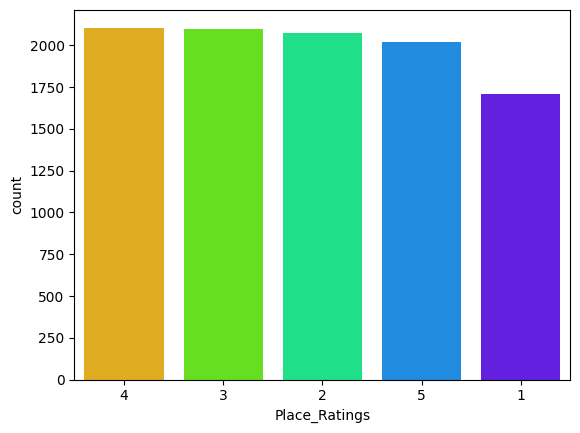

In [15]:
count = all_tourism['Place_Ratings'].value_counts()
percent = 100 * all_tourism['Place_Ratings'].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(x = all_tourism['Place_Ratings'], data = all_tourism, palette = 'gist_rainbow', order = all_tourism['Place_Ratings'].value_counts().index)

Dapat dilihat pada visualisasi diatas, masing-masing rating memiliki persentase yang hampir mirip, berikut merupakan persentase dan jumlah sample secara spesifik dari visualisasi diatas diurutkan dari yang terbanyak hingga terendah :
  - Rating 4 : 2106 sample, 21.1%
  - Rating 3 : 2096 sample, 21.0%
  - Rating 2 : 2071 sample, 20.7%
  - Rating 5 : 2021 sample, 20.2%
  - Rating 1 : 1706 sample, 17.1%

                    Jumlah sample  Persentase
Taman Hiburan                3053        30.5
Budaya                       2683        26.8
Cagar Alam                   2415        24.2
Bahari                       1079        10.8
Pusat Perbelanjaan            385         3.8
Tempat Ibadah                 385         3.8


<Axes: xlabel='Category', ylabel='count'>

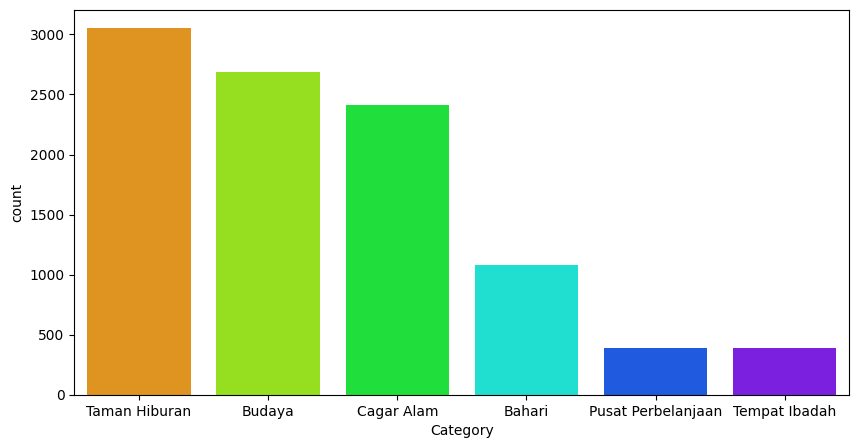

In [16]:
count = all_tourism['Category'].value_counts()
percent = 100 * all_tourism['Category'].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
plt.figure(figsize = (10,5))
sns.countplot(x = all_tourism['Category'], data = all_tourism, palette = 'gist_rainbow', order = all_tourism['Category'].value_counts().index)

Terlihat bahwa 50% dari keseluruhan data berada pada Category Taman Hiburan dan Budaya, berikut merupakan presentase dan jumlah sample spesifik dari fitur Category diurutkan dari terbesar hingga terendah :
  - Taman Hiburan : 3053 sample, 30.5%
  - Budaya : 2683 sample, 26.8%
  - Cagar Alam : 2415 sample, 24.2%
  - Bahari : 1079 sample, 10.8%
  - Pusat Perbelanjaan : 385 sample, 3.8%
  - Tempat Ibadah : 385 sample, 3.8%

In [17]:
print('Banyak tempat wisata : ', len(all_tourism['Place_Name'].unique()))
print('Nama Tempat : ', all_tourism['Place_Name'].unique())

Banyak tempat wisata :  437
Nama Tempat :  ['Candi Ratu Boko' 'Pantai Marina' 'Atlantis Water Adventure'
 'Museum Kereta Ambarawa' 'Kampung Wisata Sosro Menduran'
 'Taman Hutan Raya Ir. H. Juanda' 'Museum Gedung Sate'
 'Museum Taman Prasasti' 'Pantai Ngrawe (Mesra)' 'Taman Harmoni Keputih'
 'Tugu Pal Putih Jogja' 'Taman Sungai Mudal' 'De Mata Museum Jogja'
 'Surabaya North Quay' 'Museum Bahari Jakarta' 'Grand Maerakaca'
 'Margasatwa Muara Angke' 'Curug Anom' 'Museum Konferensi Asia Afrika'
 'Taman Cattleya' 'Monumen Bambu Runcing Surabaya' 'Pasar Seni'
 'Curug Tilu Leuwi Opat' 'Museum Mandala Wangsit Siliwangi'
 'Museum Wayang' 'Gua Pawon' 'Perkebunan Teh Malabar' 'Masjid Pusdai'
 'Taman Ismail Marzuki' 'Bentara Budaya Yogyakarta (BBY)' 'Kota Tua'
 'Bukit Jamur' 'Gereja Katedral' 'Taman Pintar Yogyakarta'
 'Wisata Eling Bening' 'Hutan Kota Srengseng' 'Puncak Pinus Becici'
 'Bangsal Pagelaran' 'Pantai Krakal' 'Museum TNI AL Loka Jala Crana'
 'Brown Canyon' 'Gereja Perawan Maria Tak Berd

Untuk fitur Place_Name disini hanya menampilkan banyak tempat wisata. Diperoleh bahwa banyak tempat wisata yang akan digunakan untuk sistem rekomendasi adalah sebanyak 437.

# **DATA PREPARATION**

In [18]:
#cek null value
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Category         0
Place_Name       0
dtype: int64

In [19]:
len(all_tourism.Place_Id.unique())

437

In [20]:
all_tourism['Category'].unique()

array(['Budaya', 'Bahari', 'Taman Hiburan', 'Cagar Alam',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [21]:
#mengurutkan Place_Id
preparation = all_tourism
preparation.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
6236,187,1,4,Budaya,Monumen Nasional
5348,162,1,5,Budaya,Monumen Nasional
5610,169,1,5,Budaya,Monumen Nasional
2089,64,1,2,Budaya,Monumen Nasional
5231,159,1,1,Budaya,Monumen Nasional
...,...,...,...,...,...
8710,263,437,5,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
6209,187,437,5,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
7082,213,437,4,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
6041,182,437,1,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya


Place_Id diurutkan untuk mengetahui apakah terdapat data duplikat atau tidak

In [22]:
preparation = preparation.drop_duplicates('Place_Id')
preparation

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
0,1,179,3,Budaya,Candi Ratu Boko
1,1,344,2,Bahari,Pantai Marina
2,1,5,5,Taman Hiburan,Atlantis Water Adventure
3,1,373,3,Budaya,Museum Kereta Ambarawa
4,1,101,4,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...,...,...
2008,62,370,1,Budaya,Benteng Pendem
2399,74,350,4,Bahari,Pantai Cipta
2448,75,10,2,Bahari,Pulau Tidung
2534,78,7,4,Cagar Alam,Kebun Binatang Ragunan


In [23]:
#membuat variabel baru untuk dictianory
place_id = preparation['Place_Id'].tolist()
place_category = preparation['Category'].tolist()
place_name = preparation['Place_Name'].tolist()

print(len(place_id))
print(len(place_category))
print(len(place_name))

437
437
437


In [52]:
#membuat dictianory tourism_recommend
tourism_recommend = pd.DataFrame({
    'id' : place_id,
    'place_category' : place_category,
    'place_name' : place_name
})

tourism_recommend

,id,place_category,place_name
0,179,Budaya,Candi Ratu Boko
1,344,Bahari,Pantai Marina
2,5,Taman Hiburan,Atlantis Water Adventure
3,373,Budaya,Museum Kereta Ambarawa
4,101,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...
432,370,Budaya,Benteng Pendem
433,350,Bahari,Pantai Cipta
434,10,Bahari,Pulau Tidung
435,7,Cagar Alam,Kebun Binatang Ragunan


Dibuatnya tourism_recommend untuk menampung fitur-fitur yang hanya akan digunakan untuk rekomendasi

# **MODELLING | CONTENT BASED FILTERING**

In [25]:
data = tourism_recommend
data.head()

,id,place_category,place_name
0,179,Budaya,Candi Ratu Boko
1,344,Bahari,Pantai Marina
2,5,Taman Hiburan,Atlantis Water Adventure
3,373,Budaya,Museum Kereta Ambarawa
4,101,Budaya,Kampung Wisata Sosro Menduran


In [26]:
tf = TfidfVectorizer()
tf.fit(data['place_name'])
tf.get_feature_names_out()

array(['3d', '45', '825', 'abang', 'abdullah', 'ade', 'adhyatma',
       'adventure', 'africa', 'afrika', 'agro', 'agrowisata', 'agung',
       'ahmad', 'air', 'aji', 'akbar', 'al', 'alam', 'alive', 'alun',
       'amazing', 'ambarawa', 'ancol', 'and', 'anggrek', 'angke',
       'angklung', 'anom', 'anteng', 'api', 'aquarium', 'ardilla', 'argo',
       'art', 'artha', 'aseupan', 'asia', 'asri', 'atlantis', 'ayodya',
       'babakan', 'badak', 'baduga', 'bahari', 'balai', 'bambu',
       'banaran', 'bandros', 'bandung', 'bangsal', 'bangunrejo', 'bank',
       'bantal', 'banteng', 'barat', 'barli', 'barn', 'baron', 'baru',
       'baruna', 'barunawati', 'basoeki', 'batik', 'batu', 'batununggal',
       'bay', 'bbws', 'bby', 'becici', 'begonia', 'belanda', 'bendung',
       'bening', 'bentara', 'benteng', 'berdosa', 'beringharjo', 'bibit',
       'bidadari', 'binatang', 'bintang', 'bintaran', 'biru', 'blaster',
       'blenduk', 'blue', 'boko', 'borobudur', 'bosscha', 'braga',
       'bra

Membuat sistem rekomendasi berdasarkan tempat wisata yang telah dikunjungi sebelummnya, menggunakan TF-IDF Vectorizer dengan fungsi `tfidfvectorizer()` dari sklearn. Tahap ini terdiri dari inisialisasi TfidfVectorizer, kemudian perhitungan idf pada place_name dan mapping array dari fitur index ke fitur nama.

In [27]:
#mengubah data dalam bentuk matrix integer
tfdif_matrix = tf.fit_transform(data['place_name'])
tfdif_matrix.shape

(437, 712)

In [28]:
#mengubah vektor tf-dif dalam bentuk matrix
tfdif_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
pd.DataFrame(
    tfdif_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = data.place_category  
).sample(22, axis = 1).sample(10, axis = 0)

,lembang,3d,daarut,camp,perpustakaan,kalipancur,argo,gumuk,ekspresi,crana,...,ecopark,empat,agung,batununggal,marzuki,tirto,kasmaran,sambi,cibubur,sumur
place_category,,,,,,,,,,,,,,,,,,,,,
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cagar Alam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Membuat dataframe untuk melihat tf-idf matrix dengan kolom berisi place_name dan baris place_category, ini digunakan untuk melihat korelasi antar place_name dengan category.

**COSINE SIMILARITY**

In [30]:
cosine_sim = cosine_similarity(tfdif_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index = data['place_name'], columns = data['place_name'])
print('Shape : ', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis = 1).sample(10, axis = 0)

Shape :  (437, 437)


place_name,Seribu Batu Songgo Langit,Jakarta Aquarium dan Safari,Tebing Karaton,Durian Gardens and Tourism Education Watu Simbar,Monumen Batik Yogyakarta
place_name,,,,,
Museum Benteng Vredeburg Yogyakarta,0.0,0.0,0.0,0.0,0.224456
Masjid Kapal Semarang,0.0,0.0,0.0,0.0,0.000000
Embung Tambakboyo,0.0,0.0,0.0,0.0,0.000000
Museum Basoeki Abdullah,0.0,0.0,0.0,0.0,0.000000
Air Terjun Kali Pancur,0.0,0.0,0.0,0.0,0.000000
Orchid Forest Cikole,0.0,0.0,0.0,0.0,0.000000
Pesona Nirwana Waterpark & Cottages,0.0,0.0,0.0,0.0,0.000000
Taman Ismail Marzuki,0.0,0.0,0.0,0.0,0.000000
Semarang Contemporary Art Gallery,0.0,0.0,0.0,0.0,0.000000


Menghitung derajat kesamaan (similarity degree) antar place_name menggunakan cosine_similarity dari sklearn

In [32]:
#fungsi untuk rekomendasi
def tourism_recommendations(nama_tempat, similarity_data = cosine_sim_df, items = data[['place_name', 'place_category']], k = 5) :
  index = similarity_data.loc[:, nama_tempat].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(nama_tempat, errors = 'ignore')

  return pd.DataFrame(closest).merge(items).head(k)

In [33]:
data[data.place_name.eq('Pantai Baron')]

,id,place_category,place_name
384,157,Bahari,Pantai Baron


In [34]:
tourism_recommendations('Pantai Baron')

,place_name,place_category
0,Pantai Ancol,Bahari
1,Pantai Marina,Bahari
2,Pantai Congot,Bahari
3,Pantai Drini,Bahari
4,Pantai Ngrenehan,Bahari


# **MODELLING | COLLABORATIVE FILTERING**

In [35]:
cf = preparation
cf

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
0,1,179,3,Budaya,Candi Ratu Boko
1,1,344,2,Bahari,Pantai Marina
2,1,5,5,Taman Hiburan,Atlantis Water Adventure
3,1,373,3,Budaya,Museum Kereta Ambarawa
4,1,101,4,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...,...,...
2008,62,370,1,Budaya,Benteng Pendem
2399,74,350,4,Bahari,Pantai Cipta
2448,75,10,2,Bahari,Pulau Tidung
2534,78,7,4,Cagar Alam,Kebun Binatang Ragunan


In [36]:
user_ids = cf['User_Id'].unique().tolist()
print('list User_Id : ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id : ', user_encoded_to_user)

list User_Id :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 51, 52, 53, 54, 55, 60, 62, 74, 75, 78, 90]
encoded User_Id :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 40: 38, 41: 39, 42: 40, 43: 41, 44: 42, 45: 43, 47: 44, 48: 45, 51: 46, 52: 47, 53: 48, 54: 49, 55: 50, 60: 51, 62: 52, 74: 53, 75: 54, 78: 55, 90: 56}
encoded angka ke User_Id :  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 35, 34: 36, 35: 37, 36: 38, 3

In [37]:
place_ids = cf['Place_Id'].unique().tolist()
print('list Place_Id : ', place_ids)

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded Place_Id : ', place_to_place_encoded)

place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('encoded angka ke Place_Id : ', place_encoded_to_place)

list Place_Id :  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 

In [38]:
cf['user'] = cf['User_Id'].map(user_to_user_encoded)
cf['place'] = cf['Place_Id'].map(place_to_place_encoded)

<ipython-input-38-629bf3af93de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf['user'] = cf['User_Id'].map(user_to_user_encoded)
<ipython-input-38-629bf3af93de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf['place'] = cf['Place_Id'].map(place_to_place_encoded)


In [39]:
num_users = len(user_to_user_encoded)
print(num_users)

num_places = len(place_encoded_to_place)
print(num_places)

cf['Place_Ratings'] = cf['Place_Ratings'].values.astype(np.float32)

min_rating = min(cf['Place_Ratings'])

max_rating = max(cf['Place_Ratings'])

print('Number of User : {}, Number of Place : {}, Min Rating {}, Max Rating {}'.format(
    num_users, num_places, min_rating, max_rating
))

57
437
Number of User : 57, Number of Place : 437, Min Rating 1.0, Max Rating 5.0


<ipython-input-39-77a73e5d109d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf['Place_Ratings'] = cf['Place_Ratings'].values.astype(np.float32)


- Encoder User_Id dan Place_Id menjadi indeks integer.
- Encoder User_Id dan Place_Id menjadi indeks integer.
- Mapping User_Id dan Place_Id kedalam proses encoder sebelumnya.

# **SPLITTINGA TRAINING & VALIDATION DATA**

In [40]:
cf = cf.sample(frac = 1, random_state = 30)
cf

,User_Id,Place_Id,Place_Ratings,Category,Place_Name,user,place
324,12,49,5.0,Budaya,Galeri Indonesia Kaya,11,224
350,12,293,5.0,Taman Hiburan,Taman Badak,11,236
334,12,65,2.0,Budaya,Museum Basoeki Abdullah,11,230
369,13,156,3.0,Bahari,Pantai Pulang Sawal,12,241
82,3,24,4.0,Budaya,Museum Nasional,2,74
...,...,...,...,...,...,...,...
165,6,398,5.0,Taman Hiburan,Taman Buah Surabaya,5,140
556,18,261,2.0,Cagar Alam,Ciwangun Indah Camp Official,17,301
1760,54,361,1.0,Taman Hiburan,Wisata Kampung Krisan Clapar,49,429
1432,45,146,4.0,Cagar Alam,Bukit Wisata Pulepayung,43,421


In [41]:
x = cf[['User_Id', 'Place_Id']].values

y = cf['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 12  49]
 [ 12 293]
 [ 12  65]
 [ 13 156]
 [  3  24]
 [ 15 260]
 [ 10  12]
 [ 25 299]
 [ 10 280]
 [  7 296]
 [ 30 216]
 [ 20 374]
 [ 10 197]
 [  4 377]
 [ 75  10]
 [ 11 355]
 [ 16 270]
 [  4 309]
 [ 60 271]
 [ 17  47]
 [  2 322]
 [ 29 291]
 [ 15 357]
 [  1 246]
 [  7 192]
 [  7 269]
 [  9 304]
 [ 14  96]
 [ 16 414]
 [  5  27]
 [  5 138]
 [ 10  36]
 [  3 227]
 [ 12  52]
 [ 11 226]
 [ 30 120]
 [  8 267]
 [  6 219]
 [ 74 350]
 [ 17 199]
 [ 21 427]
 [ 19 400]
 [  6 178]
 [  8 275]
 [ 23 152]
 [  6  64]
 [ 31 345]
 [  1 179]
 [ 17 279]
 [  6 121]
 [ 27 174]
 [  1 373]
 [ 17 181]
 [ 14 171]
 [ 22 244]
 [ 12 369]
 [  3 202]
 [  9 341]
 [ 11  37]
 [ 54  51]
 [  2 185]
 [ 32 122]
 [ 11  11]
 [ 45 232]
 [  1 302]
 [  7 213]
 [  5   9]
 [  5 143]
 [ 19 418]
 [ 11 149]
 [ 12 429]
 [  2  78]
 [ 11 127]
 [  4  91]
 [  3 131]
 [ 22 169]
 [  9 403]
 [  5  61]
 [ 10 234]
 [ 30 282]
 [ 30 431]
 [ 31 273]
 [  4 409]
 [  3 134]
 [ 19 432]
 [  1 103]
 [  7  99]
 [ 40 106]
 [ 20 136]
 [ 35 254]
 [  1 405]

- Distribusi data dengan random_state agar data menjadi acak.
- Mapping data User_Id dan Place_Id menjadi skala 0 sampai 1
- Split data train dan validation menjadi 80:20

In [44]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )

    self.user_bias = layers.Embedding(num_users, 1)
    self.places_embedding = layers.Embedding(
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1)
  
  def call(self, inputs) :
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    places_vector = self.places_embedding(inputs[:, 1])
    places_bias = self.places_bias(inputs[:, 1])

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x)

- Pada proses ini menghitung skor kecocokan wisatawan atau turis dengan destinasi wisata dengan teknik embedding.
- Membuat class RecommenderNet dengan keras Model class.
- Menginisialisasikan fungsi embedding.
- Membuat layer embedding user dan layer embedding user dengan bias.
- Membuat layer embedding place dan layer embedding place dengan bias.
- Membuat fungsi call yang memanggil layer embedding 1,2,3, dan 4.
- Kemudian menggunakan activation sigmoid.
- Lakukan compile pada model yang telah dibuat dengan loss `BinaryCrossentropy()`, optimizer `Adam()` dengan `learning_rate = 0.001`, dan metrics `RootMeanSquaredError()`.
- Lakukan proses training dengan `batch_size = 8` dan `epochs = 100`.

In [45]:
model = RecommenderNet(num_users, num_places, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [46]:
hist = model.fit(x = x_train, y = y_train, batch_size = 8, epochs = 100, validation_data = (x_val, y_val))

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.7637 - root_mean_squared_error: 0.4189 - val_loss: 0.7007 - val_root_mean_squared_error: 0.3094
Epoch 2/100
1/1 [==============================] - 0s 230ms/step - loss: 0.7523 - root_mean_squared_error: 0.4122 - val_loss: 0.7007 - val_root_mean_squared_error: 0.3094
Epoch 3/100
1/1 [==============================] - 0s 347ms/step - loss: 0.7414 - root_mean_squared_error: 0.4056 - val_loss: 0.7007 - val_root_mean_squared_error: 0.3094
Epoch 4/100
1/1 [==============================] - 0s 220ms/step - loss: 0.7309 - root_mean_squared_error: 0.3992 - val_loss: 0.7006 - val_root_mean_squared_error: 0.3093
Epoch 5/100
1/1 [==============================] - 0s 350ms/step - loss: 0.7209 - root_mean_squared_error: 0.3929 - val_loss: 0.7006 - val_root_mean_squared_error: 0.3093
Epoch 6/100
1/1 [==============================] - 0s 221ms/step - loss: 0.7113 - root_mean_squared_error: 0.3868 - val_loss: 0.7006 - val_root_mean

# **METRICS VISUALIZATION**

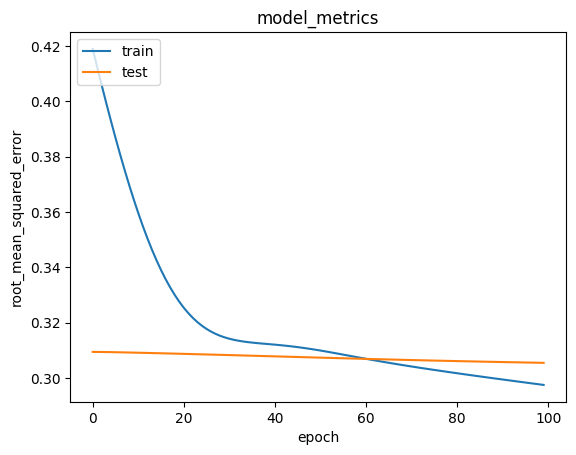

In [47]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Dapat disumpulkan pada proses training nilai error akhir untuk training berada pada angka 0.29 dan error pada test pada angka 0.31. Sehingga nilai tersebut sudah cukup bagus untuk sistem rekomendasi `collaborative filtering`.

# **PLACES RECOMMENDATION**

In [50]:
places_cf = tourism_recommend
cf = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/tourism_rating.csv')

cf['Place_Ratings'] = cf['Place_Ratings'].values.astype(np.float32)

user_id = cf.User_Id.sample(1).iloc[0]
places_visited_by_user = cf[cf.User_Id == user_id]

places_not_visited = places_cf[~places_cf['id'].isin(places_visited_by_user.Place_Id.values)]['id']
places_not_visited = list(
    set(places_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

places_not_visited = [[place_to_place_encoded.get(x)] for x in places_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_places_array = np.hstack(
    ([[user_encoder]] * len(places_not_visited), places_not_visited)
)

Agar mendapatkan rekomendasi destinasi wisata, sebaiknya acak sample yang didefinisikan pada places_not_visited menggunakan operator bitwise (~) yang diperoleh pada variabel places_visited_by_user.

In [51]:
ratings = model.predict(user_places_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_places_ids = [
    place_encoded_to_place.get(places_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users : {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)

top_places_user = (
    places_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
places_df_rows = places_cf[places_cf['id'].isin(top_places_user)]
for row in places_df_rows.itertuples():
  print(row.place_name, ':', row.place_category)

print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_places = places_cf[places_cf['id'].isin(recommended_places_ids)]
for row in recommended_places.itertuples():
  print(row.place_name, ':', row.place_category)

13/13 [==============================] - 0s 2ms/step
Showing recommendations for users : 41
Place with high ratings from user
--------------------------------
Flower Farm Setiya Aji : Cagar Alam
Candi Gedong Songo : Budaya
Goa Rong : Cagar Alam
Pemandian Air Panas Ciater : Cagar Alam
Taman Mundu : Taman Hiburan
--------------------------------
Top 10 place recommendation
--------------------------------
Kebun Teh Nglinggo : Cagar Alam
Desa Wisata Kelor : Taman Hiburan
Seribu Batu Songgo Langit : Cagar Alam
Desa Wisata Rumah Domes/Teletubbies : Taman Hiburan
Wisata Kraton Jogja : Budaya
Grojogan Watu Purbo Bangunrejo : Taman Hiburan
Kawasan Wisata Sosrowijayan : Pusat Perbelanjaan
Pantai Baron : Bahari
Pantai Ngobaran : Bahari
Bendung Lepen : Taman Hiburan
